<a href="https://colab.research.google.com/github/MKastek/time-series-notes/blob/main/cost_of_heating_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
data_string = """
invoice issue date,cost of heating
11.2018,65
12.2018,91
1.2019,128
2.2019,123
3.2019,71
4.2019,22
5.2019,10
6.2019,5
7.2019,7
8.2019,8
9.2019,8
10.2019,24
2019-11-11,263
12.2019,385
1.2020,485
2.2020,455
3.2020,534
4.2020,328
5.2020,266
6.2020,281
7.2020,297
8.2020,307
9.2020,341
10.2020,365
11.2020,1225
12.2020,1377
1.2021,1373
2.2021,1153
2021-03-08,1209
4.2021,701
5.2021,569
6.2021,585
7.2021,625
8.2021,699
9.2021,730
10.2021,743
2021-11-09,1765
12.2021,1872
1/2022,1840
2/2022,1704
3/2022,2313
4/2022,1952
5/2022,1755
6/2022,979
7/2022,1271
8/2022,1384
9/2022,1360
10/2022,1363
11/2022,2719
12/2022,2961
"""

In [67]:
df = pd.read_csv(StringIO(data_string))

In [68]:

df

,invoice issue date,cost of heating
0,11.2018,65
1,12.2018,91
2,1.2019,128
3,2.2019,123
4,3.2019,71
5,4.2019,22
6,5.2019,10
7,6.2019,5
8,7.2019,7
9,8.2019,8


In [69]:
df['invoice issue date'] = df['invoice issue date'].apply(lambda x: x.replace('.','/'))

In [70]:
df['invoice issue date'] = pd.to_datetime(df['invoice issue date'].replace('.','/'), errors='coerce')

<ipython-input-70-d7accbce177a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['invoice issue date'] = pd.to_datetime(df['invoice issue date'].replace('.','/'), errors='coerce')


In [71]:
df['invoice issue date'] = df['invoice issue date'].dt.to_period('M').dt.to_timestamp()

In [72]:
df

,invoice issue date,cost of heating
0,2018-11-01,65
1,2018-12-01,91
2,2019-01-01,128
3,2019-02-01,123
4,2019-03-01,71
5,2019-04-01,22
6,2019-05-01,10
7,2019-06-01,5
8,2019-07-01,7
9,2019-08-01,8


<Axes: xlabel='invoice issue date'>

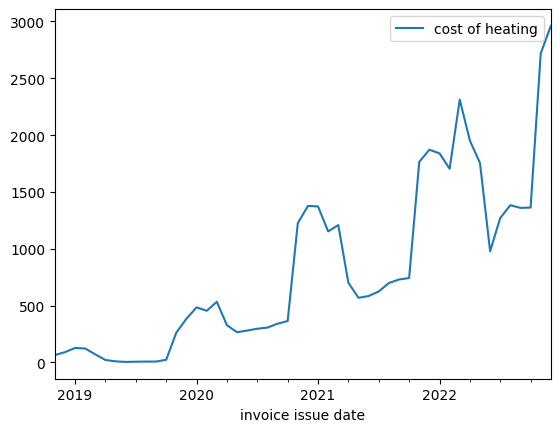

In [73]:
df.plot(x='invoice issue date', y='cost of heating')

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(x=df['cost of heating'], model='additive', period=12)
est_trend = result.trend
est_seasonal = result.seasonal
est_residual = result.resid

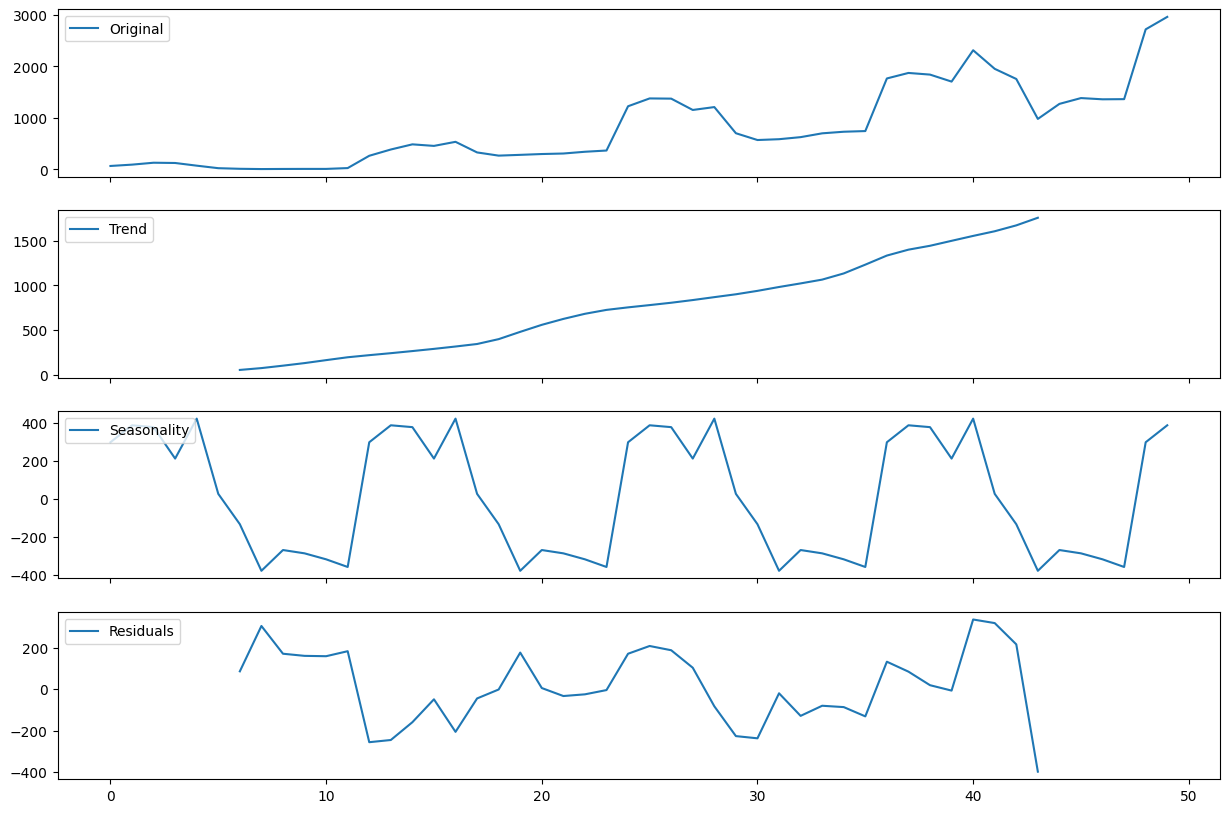

In [98]:

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df['cost of heating'], label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(est_trend , label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(est_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(est_residual, label='Residuals')
axes[3].legend(loc='upper left');

In [99]:

df

,invoice issue date,cost of heating
0,2018-11-01,65
1,2018-12-01,91
2,2019-01-01,128
3,2019-02-01,123
4,2019-03-01,71
5,2019-04-01,22
6,2019-05-01,10
7,2019-06-01,5
8,2019-07-01,7
9,2019-08-01,8


In [100]:
reconstructed = result.trend + result.seasonal + result.resid

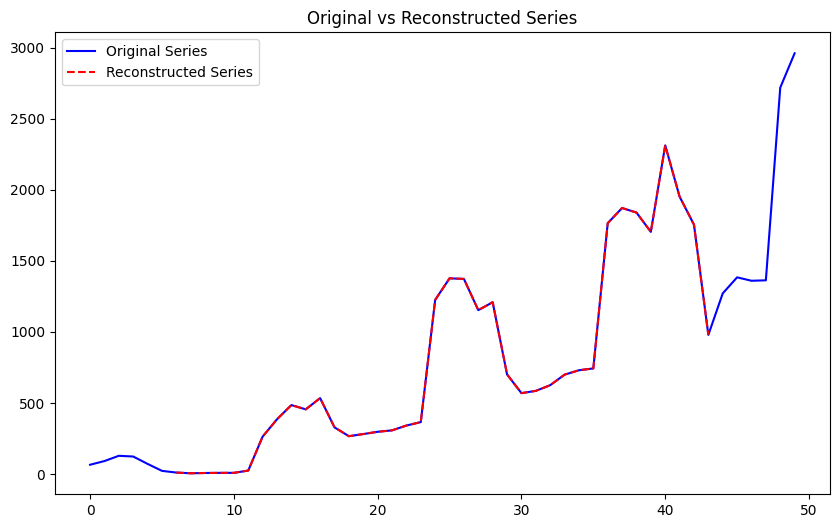

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(df['cost of heating'], label='Original Series', color='blue')
plt.plot(reconstructed, label='Reconstructed Series', color='red', linestyle='--')
plt.legend()
plt.title("Original vs Reconstructed Series")
plt.show()